In [43]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
from pathlib import Path
import requests as rq

def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])


def get_set(url):
    '''getting dataset of card from scry fall'''
    idents = {
    '': 'Colorless',
    'W':'White',
    'U':'Blue',
    'B': 'Black',
    'R': 'Red',
    'G':'Green',
    'B W':'Orzhov',
    'R W':'Boros',
    'G U':'Simic',
    'R U':'Izzet',
    'B G':'Golgari',
    'R U W':'Jeskai',
    'B R W':'Mardu',
    'B G W':'Abzan', 
    'B G U':'Sultai', 
    'G R U':'Temur'
    }
    s = rq.Session()
    response = s.get(str(url))
    orderList = []
    resp_json = response.json()
    orderList.append(resp_json["data"])
    while resp_json.get('has_more'):
        response = s.get(resp_json['next_page'])
        resp_json = response.json()
        orderList.append(resp_json["data"])
        orderList= orderList[0]+orderList[1]
        df=pd.DataFrame(orderList)
        sels = ["name", "type_line", "colors", "mana_cost", "cmc", "oracle_text", "power", "toughness", "keywords", "loyalty", "rarity"]
        df = df[sels]
        df[['Super Type','Sub type']] = df['type_line'].apply(lambda x: pd.Series(str(x).split("—")))
        df = df.drop(['type_line'], axis=1)
        df.columns = df.columns.str.replace('_', ' ')
        df.columns = df.columns.str.capitalize()
        df = movecol(df, 
            cols_to_move=['Super type','Sub type'], 
            ref_col='Name',
            place='After')
        df['Colors'] = df['Colors'].apply(lambda x: ' '.join(x))
        df['Colors'] = df['Colors'].replace(idents)
        return(df)
        
        

ktk = get_set("https://api.scryfall.com/cards/search?q=set:ktk")

print(ktk.columns)

Index(['Name', 'Super type', 'Sub type', 'Colors', 'Mana cost', 'Cmc',
       'Oracle text', 'Power', 'Toughness', 'Keywords', 'Loyalty', 'Rarity'],
      dtype='object')


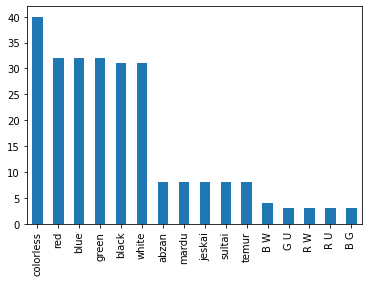

In [44]:
d = ktk['Colors'].value_counts()

plt = d.plot(kind = 'bar')

